<a href="https://colab.research.google.com/github/AK18k/auto_map/blob/main/AUTOMAP_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AK18k/auto_map

Cloning into 'auto_map'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 133 (delta 77), reused 28 (delta 12), pack-reused 0
Receiving objects: 100% (133/133), 12.00 MiB | 10.29 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [2]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import save_image
import os
import random
import tensorflow as tf
from tensorflow.python.framework import ops
import cv2
import math
import time
from scipy.io import loadmat
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape
from tensorflow.keras import Model
import glob
from torchvision.transforms import functional as F
from torchvision.transforms import RandomCrop

#from numba import cuda




In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# Define the directory path
directory = '/content/drive/MyDrive/automap/imgs'

# Get a list of all files in the directory
file_list = os.listdir(directory)

print(f'raw img count = {len(file_list)}')

# Select 10 random files from the list
selected_files = file_list[0:200]

# Create a list of full paths for the selected files
file_paths = [os.path.join(directory, filename) for filename in selected_files]

print(file_paths)

# # Print the filenames and their full paths
# for filename, path in zip(random_files, file_paths):
#     print(f"Filename: {filename}")
#     print(f"Full Path: {path}")
#     print()


raw img count = 137
['/content/drive/MyDrive/automap/imgs/10155709300728342918543955138521808206_f7cj92.png', '/content/drive/MyDrive/automap/imgs/10383960670432673238945376919735423432_hd3moq.png', '/content/drive/MyDrive/automap/imgs/1256842362861431725328351539259305635_u1qifz.png', '/content/drive/MyDrive/automap/imgs/10287653421930576798556842610982533460_vpbhw6.png', '/content/drive/MyDrive/automap/imgs/17517381147706809156163698942582418325_tutfbr.png', '/content/drive/MyDrive/automap/imgs/23519598294167460669966745319398153772_4fvhwr.png', '/content/drive/MyDrive/automap/imgs/17871983995291973291210205507121602296_hd8ger.png', '/content/drive/MyDrive/automap/imgs/18104280246346700713752899198427570737_ezdqyq.png', '/content/drive/MyDrive/automap/imgs/24716339483627393401392199056832608433_wtt5qq.png', '/content/drive/MyDrive/automap/imgs/10996416492353037588312781035930080694_8rstz0.png', '/content/drive/MyDrive/automap/imgs/26740916849083948015827135783885268528-2_6hkbx5.png',

In [50]:

def resize_images(image_paths, output_size):
    transform = transforms.Compose([
        transforms.Resize(output_size),
        transforms.ToTensor()
    ])

    resized_images = []

    file_index = -1
    for path in image_paths:
        file_index = file_index + 1

        print(f'file {file_index}/{len(image_paths)}')

        gray_image = Image.open(path)
        # display(gray_image)

        # data = np.array(gray_image)
        # print(np.unique(data))
        # # Display the histogram
        # plt.hist(data.flatten(), bins=256, color='gray', alpha=0.7)
        # plt.xlabel('Pixel Value')
        # plt.ylabel('Frequency')
        # plt.title('Histogram of Gray Image')
        # plt.show()

        transform = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor(),])
        gray_tensor = transform(gray_image)

        gray_tensor_squeezed = gray_tensor.squeeze(0)
        gray_arr = gray_tensor_squeezed.numpy()

        # # Display the histogram
        # plt.hist(gray_arr.flatten(), bins=256, color='gray', alpha=0.7)
        # plt.xlabel('Pixel Value')
        # plt.ylabel('Frequency')
        # plt.title('Histogram of gray_tensor_arr')
        # plt.show()


        # plt.imshow(gray_arr, cmap='gray')
        # plt.title('gray_arr')
        # plt.show()

        gray_arr_norm = gray_arr * 255 / np.max(gray_arr)
        # plt.imshow(gray_arr_norm, cmap='gray')
        # plt.title('gray_arr_norm')
        # plt.show()

        # plt.hist(gray_arr_norm.flatten(), bins=256, color='gray', alpha=0.7)
        # plt.xlabel('Pixel Value')
        # plt.ylabel('Frequency')
        # plt.title('Histogram ofgray_arr_norm')
        # plt.show()

        transform = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor(),])
        gray_img_scaled_tensor = transform(gray_image)

        gray_tensor_scaled_squeezed = gray_img_scaled_tensor.squeeze(0)
        gray_scaled_arr = gray_tensor_scaled_squeezed.numpy()

        # plt.imshow(gray_scaled_arr, cmap='gray')
        # plt.title('gray_scaled_arr')
        # plt.show()

        tile_size = 128
        tiles = gray_tensor.unfold(1, tile_size, tile_size).unfold(2, tile_size, tile_size)
        tiles = tiles.contiguous().view(-1, tile_size, tile_size)

        for tile_index, tile in enumerate(tiles):
          tile = tile / tile.max()
          save_image(tile, f'/content/drive/MyDrive/automap/img_tiles/file_{file_index}_tile_{tile_index}.png')


        resized_image = transform(gray_image)
        resized_images.append(resized_image)


    return torch.stack(resized_images)

# Example usage
image_paths = file_paths
output_size = (256, 256)
resized_batch = resize_images(image_paths, output_size)

file 0/137
file 1/137
file 2/137
file 3/137
file 4/137
file 5/137
file 6/137
file 7/137
file 8/137
file 9/137
file 10/137
file 11/137
file 12/137
file 13/137
file 14/137
file 15/137
file 16/137
file 17/137
file 18/137
file 19/137
file 20/137
file 21/137
file 22/137
file 23/137
file 24/137
file 25/137
file 26/137
file 27/137
file 28/137
file 29/137
file 30/137
file 31/137
file 32/137
file 33/137
file 34/137
file 35/137
file 36/137
file 37/137
file 38/137
file 39/137
file 40/137
file 41/137
file 42/137
file 43/137
file 44/137
file 45/137
file 46/137
file 47/137
file 48/137
file 49/137
file 50/137
file 51/137
file 52/137
file 53/137
file 54/137
file 55/137
file 56/137
file 57/137
file 58/137
file 59/137
file 60/137
file 61/137
file 62/137
file 63/137
file 64/137
file 65/137
file 66/137
file 67/137
file 68/137
file 69/137
file 70/137
file 71/137
file 72/137
file 73/137
file 74/137
file 75/137
file 76/137
file 77/137
file 78/137
file 79/137
file 80/137
file 81/137
file 82/137
file 83/137
fi

In [ ]:
print(file_paths)

['/content/drive/MyDrive/automap/imgs/10155709300728342918543955138521808206_f7cj92.png', '/content/drive/MyDrive/automap/imgs/10383960670432673238945376919735423432_hd3moq.png', '/content/drive/MyDrive/automap/imgs/1256842362861431725328351539259305635_u1qifz.png', '/content/drive/MyDrive/automap/imgs/10287653421930576798556842610982533460_vpbhw6.png', '/content/drive/MyDrive/automap/imgs/17517381147706809156163698942582418325_tutfbr.png', '/content/drive/MyDrive/automap/imgs/23519598294167460669966745319398153772_4fvhwr.png', '/content/drive/MyDrive/automap/imgs/17871983995291973291210205507121602296_hd8ger.png', '/content/drive/MyDrive/automap/imgs/18104280246346700713752899198427570737_ezdqyq.png', '/content/drive/MyDrive/automap/imgs/24716339483627393401392199056832608433_wtt5qq.png', '/content/drive/MyDrive/automap/imgs/10996416492353037588312781035930080694_8rstz0.png', '/content/drive/MyDrive/automap/imgs/26740916849083948015827135783885268528-2_6hkbx5.png', '/content/drive/MyD

In [ ]:
# Load training data that were cropped and resized in MATLAB
# def load_STONE_data(folder, n_cases, normalize=False, imrotate=False):
#     """
#     """
#     temp = loadmat(os.path.join(folder, 'Stone_all_crop_64'))['crop_data_resize']
#     row, col, t1w, sli, n = temp.shape
#     temp = np.reshape(temp[:,:,:,:,n_cases[0]:n_cases[1]], (row, col, -1))
#     bigy = np.transpose(temp, (2,0,1))

#     # convert to k-space
#     imgs, row, col = bigy.shape
#     bigx = np.empty((imgs, row, col, 2))
#     for i in range(imgs):
#         bigx[i, :, :, :] = create_x(np.squeeze(bigy[i,:,:]), normalize=False)

#     # convert bigx from complex to abs values
#     bigy = np.abs(bigy)

#     return bigx, bigy

# def create_x(y, normalize=False):
#     """
#     Prepares frequency data from image data: applies to_freq_space,
#     expands the dimensions from 3D to 4D, and normalizes if normalize=True
#     :param y: input image
#     :param normalize: if True - the frequency data will be normalized
#     :return: frequency data 4D array of size (1, im_size1, im_size2, 2)
#     """
#     x = to_freq_space(y)  # FFT: (128, 128, 2)
#     x = np.expand_dims(x, axis=0)  # (1, 128, 128, 2)
#     if normalize:
#         x = x - np.mean(x)

#     return x


# def to_freq_space(img):
#     """ Performs FFT of an image
#     :param img: input 2D image
#     :return: Frequency-space data of the input image, third dimension (size: 2)
#     contains real ans imaginary part
#     """

#     img_f = np.fft.fft2(img)  # FFT
#     img_fshift = np.fft.fftshift(img_f)  # FFT shift
#     img_real = img_fshift.real  # Real part: (im_size1, im_size2)
#     img_imag = img_fshift.imag  # Imaginary part: (im_size1, im_size2)
#     img_real_imag = np.dstack((img_real, img_imag))  # (im_size1, im_size2, 2)

#     return img_real_imag





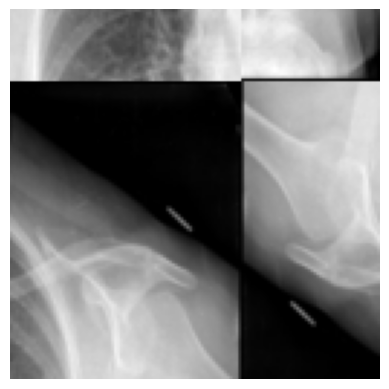

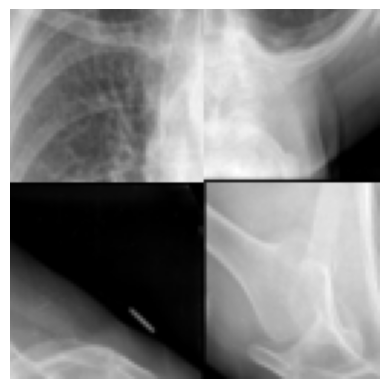

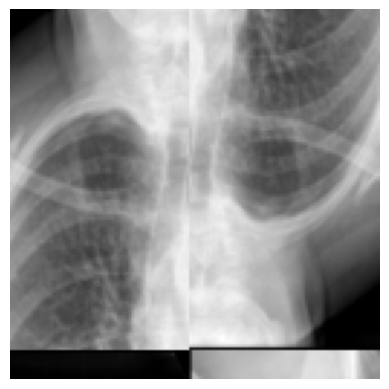

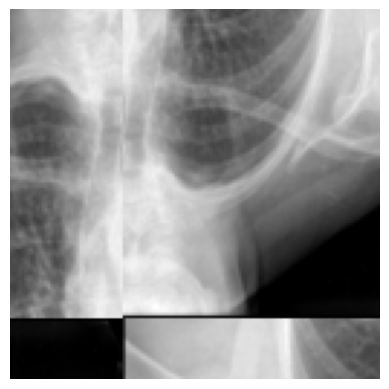

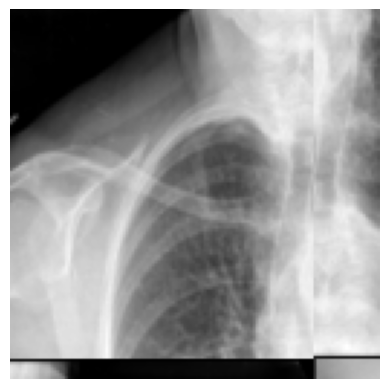

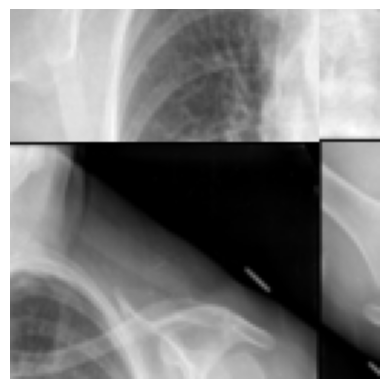

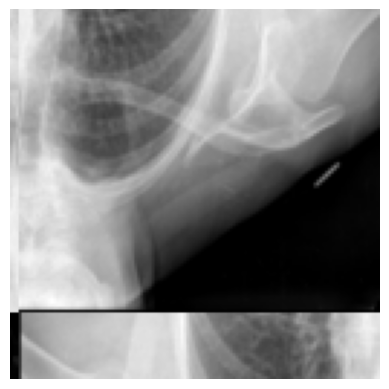

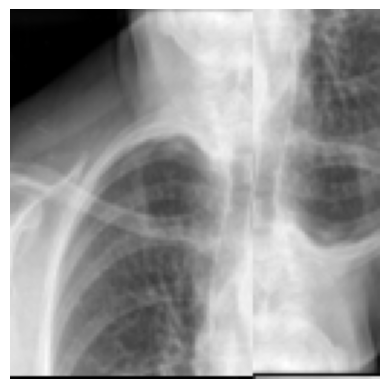

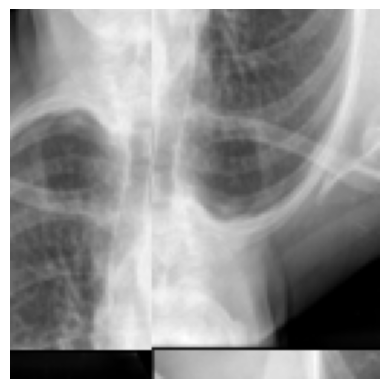

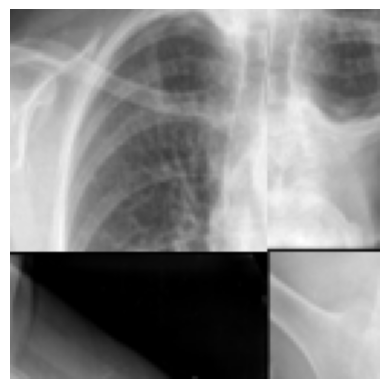

In [6]:
# import torch
# from torchvision.transforms import functional as F
# from torchvision.transforms import RandomCrop
# import PIL.Image as Image
# import numpy as np

class SymmetricTiling:
    def __init__(self, size=128, num_crops=10):
        self.size = size
        self.random_crop = RandomCrop(size)
        self.num_crops = num_crops

    def __call__(self, img):
        # Symmetrically tile the image
        top_bottom_flip = F.hflip(img)
        tiled_img = torch.cat((img, top_bottom_flip), dim=1)
        left_right_flip = F.vflip(tiled_img)
        tiled_img = torch.cat((tiled_img, left_right_flip), dim=2)

        # Random 128x128 cropping 10 times
        crops = []
        for _ in range(self.num_crops):
            crops.append(self.random_crop(tiled_img))

        return crops

# Assuming you're working with PIL Image, if not convert your image to PIL Image
img_path = "/content/drive/MyDrive/automap/img_tiles/file_0_tile_0.png"
img = Image.open(img_path)

# image = tf.io.read_file(img_path)

# Decode the image
# image = tf.image.decode_image(image, channels=1)

# Convert the image to float values between 0 and 1
# image = tf.image.convert_image_dtype(image, tf.float32)



# Convert PIL Image to tensor
img_tensor = F.to_tensor(img)

# Create the augmentor and apply
augmentor = SymmetricTiling()
augmented_tensors = augmentor(img_tensor)

for augmented_tensor in augmented_tensors:
  # Convert tensor back to PIL Image for visualization (if needed)
  augmented_img = F.to_pil_image(augmented_tensor)

  plt.imshow(augmented_img)
  plt.axis('off')  # Turn off the axis numbers
  plt.show()



In [51]:
def create_x(y, normalize=False):
    """
    Prepares frequency data from image data: applies to_freq_space,
    expands the dimensions from 3D to 4D, and normalizes if normalize=True
    :param y: input image
    :param normalize: if True - the frequency data will be normalized
    :return: frequency data 4D array of size (1, im_size1, im_size2, 2)
    """
    x = to_freq_space(y)  # FFT: (128, 128, 2)
    x = np.expand_dims(x, axis=0)  # (1, 128, 128, 2)
    if normalize:
        x = x - np.mean(x)

    return x


def to_freq_space(img):
    """ Performs FFT of an image
    :param img: input 2D image
    :return: Frequency-space data of the input image, third dimension (size: 2)
    contains real ans imaginary part
    """

    img_f = np.fft.fft2(img)  # FFT
    img_fshift = np.fft.fftshift(img_f)  # FFT shift
    img_real = img_fshift.real  # Real part: (im_size1, im_size2)
    img_imag = img_fshift.imag  # Imaginary part: (im_size1, im_size2)
    img_real_imag = np.dstack((img_real, img_imag))  # (im_size1, im_size2, 2)

    return img_real_imag



def load_x_ray_data(train_imgs_dir, img_file_start, img_file_stop):
  # Get a list of all the image file paths
  file_paths = glob.glob(f'{train_imgs_dir}/*.png')
  file_paths = file_paths[img_file_start:img_file_stop]

  # Create a dataset of the file paths
  dataset = tf.data.Dataset.from_tensor_slices(file_paths)

  # Function to load and preprocess each image
  def load_and_preprocess_image(path):
      # Read the image from disk
      image = tf.io.read_file(path)

      # Decode the image
      image = tf.image.decode_image(image, channels=1)

      # Convert the image to float values between 0 and 1
      image = tf.image.convert_image_dtype(image, tf.float32)

      return image

  # Apply the function to each image in the dataset
  dataset = dataset.map(load_and_preprocess_image)

  # Convert the dataset to a single tensor
  images = tf.stack(list(dataset))

  bigy = images.numpy()
  bigy = np.squeeze(bigy)

  print(f'bigy.shape = {bigy.shape}')

  # convert to k-space
  imgs, row, col = bigy.shape
  bigx = np.empty((imgs, row, col, 2))
  for i in range(imgs):
      bigx[i, :, :, :] = create_x(np.squeeze(bigy[i,:,:]), normalize=False)

      print(f'processing image {i}/{range(imgs)}')

  # convert bigx from complex to abs values
  bigy = np.abs(bigy)

  return bigx, bigy


In [52]:
dir_train = '/content/drive/MyDrive/automap/img_tiles'
X_train, Y_train = load_x_ray_data(dir_train, 0, 1000)
print(f'x train shape = {X_train.shape}, y train shape = {Y_train.shape}')


bigy.shape = (548, 128, 128)
processing image 0/range(0, 548)
processing image 1/range(0, 548)
processing image 2/range(0, 548)
processing image 3/range(0, 548)
processing image 4/range(0, 548)
processing image 5/range(0, 548)
processing image 6/range(0, 548)
processing image 7/range(0, 548)
processing image 8/range(0, 548)
processing image 9/range(0, 548)
processing image 10/range(0, 548)
processing image 11/range(0, 548)
processing image 12/range(0, 548)
processing image 13/range(0, 548)
processing image 14/range(0, 548)
processing image 15/range(0, 548)
processing image 16/range(0, 548)
processing image 17/range(0, 548)
processing image 18/range(0, 548)
processing image 19/range(0, 548)
processing image 20/range(0, 548)
processing image 21/range(0, 548)
processing image 22/range(0, 548)
processing image 23/range(0, 548)
processing image 24/range(0, 548)
processing image 25/range(0, 548)
processing image 26/range(0, 548)
processing image 27/range(0, 548)
processing image 28/range(0, 

In [18]:
input_img_dir = '/content/drive/MyDrive/automap/img_tiles'

def to_normalized_grayscale(tensor):
    # Convert tensor to grayscale by averaging the channels
    grayscale_tensor = tensor.mean(dim=0, keepdim=True)

    grayscale_tensor = grayscale_tensor.squeeze()

    # If the tensor values are between 0 and 255, divide by 255 to normalize
    if grayscale_tensor.max() > 1:
        grayscale_tensor = grayscale_tensor / 255.0

    # print(f'grayscale_tensor.shape = {grayscale_tensor.shape}')

    return grayscale_tensor


# Initialize the augmentor
augmentor = SymmetricTiling()

images = []
# Read and augment images from the directory
for img_name in os.listdir(input_img_dir):
    if img_name.endswith(".png"):
        img_path = os.path.join(input_img_dir, img_name)
        img = Image.open(img_path)

        # Convert PIL Image to tensor
        img_tensor = F.to_tensor(img)

        # Augment the image to get 10 random slices
        augmented_tensors = augmentor(img_tensor)

        # Apply the conversion to each tensor in augmented_tensors
        augmented_tensors = [to_normalized_grayscale(t) for t in augmented_tensors]
        augmented_tensors = torch.stack(augmented_tensors)
        # print(f'augmented_tensors shape = {augmented_tensors.shape}')

        images.append(augmented_tensors)


        # for augmented_tensor in augmented_tensors:
        #     # Convert tensor back to PIL Image
        #     augmented_img = F.to_pil_image(augmented_tensor)

        #     plt.imshow(augmented_img, cmap='gray')
        #     plt.axis('off')  # Turn off the axis numbers
        #     plt.show()

images = torch.cat(images, dim=0)
print(f'images shape ={images.shape}')
bigy = images.numpy()
bigy = np.squeeze(bigy)

print(f'bigy.shape = {bigy.shape}')

# convert to k-space
imgs, row, col = bigy.shape
bigx = np.empty((imgs, row, col, 2))
for i in range(imgs):
    bigx[i, :, :, :] = create_x(np.squeeze(bigy[i,:,:]), normalize=False)

    print(f'processing image {i}/{range(imgs)}')

# convert bigx from complex to abs values
bigy = np.abs(bigy)

X_train = bigx
Y_train = bigy



Streaming output truncated to the last 5000 lines.
processing image 480/range(0, 5480)
processing image 481/range(0, 5480)
processing image 482/range(0, 5480)
processing image 483/range(0, 5480)
processing image 484/range(0, 5480)
processing image 485/range(0, 5480)
processing image 486/range(0, 5480)
processing image 487/range(0, 5480)
processing image 488/range(0, 5480)
processing image 489/range(0, 5480)
processing image 490/range(0, 5480)
processing image 491/range(0, 5480)
processing image 492/range(0, 5480)
processing image 493/range(0, 5480)
processing image 494/range(0, 5480)
processing image 495/range(0, 5480)
processing image 496/range(0, 5480)
processing image 497/range(0, 5480)
processing image 498/range(0, 5480)
processing image 499/range(0, 5480)
processing image 500/range(0, 5480)
processing image 501/range(0, 5480)
processing image 502/range(0, 5480)
processing image 503/range(0, 5480)
processing image 504/range(0, 5480)
processing image 505/range(0, 5480)
processing im

In [53]:
print(X_train.shape)
print(Y_train.shape)



(548, 128, 128, 2)
(548, 128, 128)


In [ ]:
# tic1 = time.time()
# # Folder with images
# dir_train = "/home/chongduan/Documents/11_AUTOMAP/Dataset"
# n_cases = (0,3) # load data from 0-3 patients
# X_train, Y_train = load_STONE_data(  # Load images for training
#     dir_train,
#     n_cases,
#     normalize=False,
#     imrotate=False)
# toc1 = time.time()
# print('Time to load data = ', (toc1 - tic1))
# print('X_train.shape at input = ', X_train.shape)
# print('Y_train.shape at input = ', Y_train.shape)

In [54]:

class AUTOMAP(Model):
    def __init__(self, n_H0, n_W0):
        super(AUTOMAP, self).__init__()

        # Compute the output shape
        self.n_out = n_H0 * n_W0

        # Define layers
        self.flatten = Flatten()
        self.fc1 = Dense(self.n_out, activation='tanh', kernel_initializer='glorot_uniform')
        self.fc2 = Dense(self.n_out, activation='tanh', kernel_initializer='glorot_uniform')
        self.reshape = Reshape((n_H0, n_W0, 1))

        # Convolutional layers
        self.conv1 = Conv2D(64, kernel_size=5, padding='same', activation='relu', kernel_initializer='glorot_uniform')
        self.conv2 = Conv2D(64, kernel_size=5, padding='same', activation='relu', kernel_initializer='glorot_uniform')

        # Deconvolutional layer
        self.deconv = Conv2D(1, kernel_size=7, padding='same', activation='relu', kernel_initializer='glorot_uniform')

    def call(self, x):
        print(f'x shape 1 = {x.shape}')
        x = self.flatten(x)
        print(f'x shape 2 = {x.shape}')
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.reshape(x)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.deconv(x)
        return x

def compute_cost(y_pred, y_true):
    """Computes cost (squared loss) between the prediction and the label image"""
    return tf.reduce_mean(tf.square(y_pred - y_true))

def train_model(X_train, Y_train, learning_rate=0.0001, num_epochs=100, minibatch_size=5):
    """Trains the model"""
    model = AUTOMAP(n_H0=X_train.shape[1], n_W0=X_train.shape[2])

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9)

    for epoch in range(num_epochs):
        aligned_batch_size = (X_train.shape[0] // minibatch_size) * minibatch_size
        print(f'aligned_batch_size = {aligned_batch_size}')
        for i in range(0, aligned_batch_size, minibatch_size):
            x_batch = X_train[i:i+minibatch_size]
            y_batch = Y_train[i:i+minibatch_size]

            x_batch = tf.convert_to_tensor(x_batch)
            y_batch = tf.convert_to_tensor(y_batch)

            with tf.GradientTape() as tape:
                y_pred = model(x_batch)
                # print(f'y_pred.shape={y_pred.shape}')
                # print(f'y_batch.shape={y_batch.shape}')

                # print(f'y_pred type = {y_pred.dtype}')
                # print(f'y_batch tppe = {y_batch.dtype}')

                y_pred = tf.squeeze(y_pred)
                # print(f'y_pred type = {y_pred.dtype}')

                loss = compute_cost(y_pred, y_batch)

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            if i % 100 == 0:
                print(f"Epoch: {epoch}, Iteration: {i}, Loss: {loss}")

    return model


In [20]:
# Define the AUTOMAP Neural Network Model
def create_placeholders(n_H0, n_W0):
    """ Creates placeholders for x and y for tf.session
    :param n_H0: image height
    :param n_W0: image width
    :return: x and y - tf placeholders
    """

    x = tf.placeholder(tf.float32, shape=[None, n_H0, n_W0, 2], name='x')
    y = tf.placeholder(tf.float32, shape=[None, n_H0, n_W0], name='y')

    return x, y

def initialize_parameters():
    """ Initializes filters for the convolutional and de-convolutional layers
    :return: parameters - a dictionary of filters (W1 - first convolutional
    layer, W2 - second convolutional layer, W3 - de-convolutional layer
    """

    W1 = tf.get_variable("W1", [5, 5, 1, 64],  # 64 filters of size 5x5
                         initializer=tf.contrib.layers.xavier_initializer
                         (seed=0))
    W2 = tf.get_variable("W2", [5, 5, 64, 64],  # 64 filters of size 5x5
                         initializer=tf.contrib.layers.xavier_initializer
                         (seed=0))
    W3 = tf.get_variable("W3", [7, 7, 64, 1],  # 64 filters of size 7x7
                         initializer=tf.contrib.layers.xavier_initializer
                         (seed=0))  # set to std conv2d, Chong Duan

    parameters = {"W1": W1,
                  "W2": W2,
                  "W3": W3}

    return parameters


def forward_propagation(x, parameters):
    """ Defines all layers for forward propagation:
    Fully connected (FC1) -> tanh activation: size (n_im, n_H0 * n_W0)
    -> Fully connected (FC2) -> tanh activation:  size (n_im, n_H0 * n_W0)
    -> Convolutional -> ReLU activation: size (n_im, n_H0, n_W0, 64)
    -> Convolutional -> ReLU activation with l1 regularization: size (n_im, n_H0, n_W0, 64)
    -> De-convolutional: size (n_im, n_H0, n_W0)
    :param x: Input - images in frequency space, size (n_im, n_H0, n_W0, 2)
    :param parameters: parameters of the layers (e.g. filters)
    :return: output of the last layer of the neural network
    """

    x_temp = tf.contrib.layers.flatten(x)  # size (n_im, n_H0 * n_W0 * 2)
    n_out = np.int(x.shape[1] * x.shape[2])  # size (n_im, n_H0 * n_W0)

#    with tf.device('/gpu:0'):
    with tf.device('/cpu:0'):
        # FC: input size (n_im, n_H0 * n_W0 * 2), output size (n_im, n_H0 * n_W0)
        FC1 = tf.contrib.layers.fully_connected(
            x_temp,
            n_out,
            activation_fn=tf.tanh,
            normalizer_fn=None,
            normalizer_params=None,
            weights_initializer=tf.contrib.layers.xavier_initializer(),
            weights_regularizer=None,
            biases_initializer=None,
            biases_regularizer=None,
            reuse=tf.AUTO_REUSE,
            variables_collections=None,
            outputs_collections=None,
            trainable=True,
            scope='fc1')

    with tf.device('/cpu:0'):
        # FC: input size (n_im, n_H0 * n_W0), output size (n_im, n_H0 * n_W0)
        FC2 = tf.contrib.layers.fully_connected(
            FC1,
            n_out,
            activation_fn=tf.tanh,
            normalizer_fn=None,
            normalizer_params=None,
            weights_initializer=tf.contrib.layers.xavier_initializer(),
            weights_regularizer=None,
            biases_initializer=None,
            biases_regularizer=None,
            reuse=tf.AUTO_REUSE,
            variables_collections=None,
            outputs_collections=None,
            trainable=True,
            scope='fc2')

    # Reshape output from FC layers into array of size (n_im, n_H0, n_W0, 1):
    FC_M = tf.reshape(FC2, [tf.shape(x)[0], tf.shape(x)[1], tf.shape(x)[2], 1])

    # Retrieve the parameters from the dictionary "parameters":
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']

    # CONV2D: filters W1, stride of 1, padding 'SAME'
    # Input size (n_im, n_H0, n_W0, 1), output size (n_im, n_H0, n_W0, 64)
    Z1 = tf.nn.conv2d(FC_M, W1, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    CONV1 = tf.nn.relu(Z1)

    # CONV2D: filters W2, stride 1, padding 'SAME'
    # Input size (n_im, n_H0, n_W0, 64), output size (n_im, n_H0, n_W0, 64)
    Z2 = tf.nn.conv2d(CONV1, W2, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    CONV2 = tf.nn.relu(Z2)

#    CONV2 = tf.layers.conv2d(
#        CONV1,
#        filters=64,
#        kernel_size=5,
#        strides=(1, 1),
#        padding='same',
#        data_format='channels_last',
#        dilation_rate=(1, 1),
#        activation=tf.nn.relu,
#        use_bias=True,
#        kernel_initializer=None,
#        bias_initializer=tf.zeros_initializer(),
#        kernel_regularizer=None,
#        bias_regularizer=None,
#        activity_regularizer=None,
##        activity_regularizer=tf.contrib.layers.l1_regularizer(0.0001),
#        kernel_constraint=None,
#        bias_constraint=None,
#        trainable=True,
#        name='conv2',
#        reuse=tf.AUTO_REUSE)

#    # DE-CONV2D: filters W3, stride 1, padding 'SAME'
#    # Input size (n_im, n_H0, n_W0, 64), output size (n_im, n_H0, n_W0, 1)
#    batch_size = tf.shape(x)[0]
#    deconv_shape = tf.stack([batch_size, x.shape[1], x.shape[2], 1])
#    DECONV = tf.nn.conv2d_transpose(CONV2, W3, output_shape=deconv_shape,
#                                    strides=[1, 1, 1, 1], padding='SAME')


#    # Use conv for the last layer, Chong Duan
#    Z2 = tf.nn.conv2d(CONV2, W3, strides=[1, 1, 1, 1], padding='SAME')
#    # RELU
#    CONV3 = tf.nn.relu(Z2)

    # Apply L1-norm on last hidden layer to the activation as described in the paper
    CONV3 = tf.layers.conv2d(
        CONV2,
        filters=1,
        kernel_size=7,
        strides=(1, 1),
        padding='same',
        data_format='channels_last',
        dilation_rate=(1, 1),
        activation=tf.nn.relu,
        use_bias=True,
        kernel_initializer=None,
        bias_initializer=tf.zeros_initializer(),
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer = None,
#        activity_regularizer=tf.contrib.layers.l1_regularizer(0.0001),
        kernel_constraint=None,
        bias_constraint=None,
        trainable=True,
        name='conv3',
        reuse=tf.AUTO_REUSE)

    DECONV = tf.squeeze(CONV3)

    return DECONV


def compute_cost(DECONV, Y):
    """
    Computes cost (squared loss) between the output of forward propagation and
    the label image
    :param DECONV: output of forward propagation
    :param Y: label image
    :return: cost (squared loss)
    """

    cost = tf.square(DECONV - Y)

    return cost


def random_mini_batches(x, y, mini_batch_size=64, seed=0):
    """ Shuffles training examples and partitions them into mini-batches
    to speed up the gradient descent
    :param x: input frequency space data
    :param y: input image space data
    :param mini_batch_size: mini-batch size
    :param seed: can be chosen to keep the random choice consistent
    :return: a mini-batch of size mini_batch_size of training examples
    """

    m = x.shape[0]  # number of input images
    mini_batches = []
    np.random.seed(seed)

    # Shuffle (x, y)
    permutation = list(np.random.permutation(m))
    shuffled_X = x[permutation, :]
    shuffled_Y = y[permutation, :]

    # Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = int(math.floor(
        m / mini_batch_size))  # number of mini batches of size mini_batch_size

    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size:k * mini_batch_size
                                    + mini_batch_size, :, :, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size:k * mini_batch_size
                                    + mini_batch_size, :, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches
                                  * mini_batch_size: m, :, :, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches
                                  * mini_batch_size: m, :, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


def model(X_train, Y_train, learning_rate=0.0001,
          num_epochs=100, minibatch_size=5, print_cost=True):
    """ Runs the forward and backward propagation
    :param X_train: input training frequency-space data
    :param Y_train: input training image-space data
    :param learning_rate: learning rate of gradient descent
    :param num_epochs: number of epochs
    :param minibatch_size: size of mini-batch
    :param print_cost: if True - the cost will be printed every epoch, as well
    as how long it took to run the epoch
    :return: this function saves the model to a file. The model can then
    be used to reconstruct the image from frequency space
    """

    with tf.device('/cpu:0'):
        ops.reset_default_graph()  # to not overwrite tf variables
        seed = 3
        (m, n_H0, n_W0, _) = X_train.shape

        # Create Placeholders
        X, Y = create_placeholders(n_H0, n_W0)

        # Initialize parameters
        parameters = initialize_parameters()

        # Build the forward propagation in the tf graph
        DECONV = forward_propagation(X, parameters)

        # Add cost function to tf graph
        cost = compute_cost(DECONV, Y)

#        # Backpropagation
#        optimizer = tf.train.RMSPropOptimizer(learning_rate,
#                                              decay=0.9,
#                                              momentum=0.0).minimize(cost)

        # Backpropagation
        # Add global_step variable for save training models - Chong Duan
        my_global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

        optimizer = tf.train.RMSPropOptimizer(learning_rate,
                                              decay=0.9,
                                              momentum=0.0).minimize(cost, global_step = my_global_step)

        # Initialize all the variables globally
        init = tf.global_variables_initializer()

        # Add ops to save and restore all the variables
        saver = tf.train.Saver(save_relative_paths=True)

        # For memory
        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True

        # Memory config
        #config = tf.ConfigProto()
        #config.gpu_options.allow_growth = True
        config = tf.ConfigProto(log_device_placement=True)

        # Start the session to compute the tf graph
        with tf.Session(config=config) as sess:

            # Initialization
            sess.run(init)

            # Training loop
            learning_curve = []
            for epoch in range(num_epochs):
                tic = time.time()

                minibatch_cost = 0.
                num_minibatches = int(m / minibatch_size)  # number of minibatches
                seed += 1
                minibatches = random_mini_batches(X_train, Y_train,
                                                  minibatch_size, seed)
                # Minibatch loop
                for minibatch in minibatches:
                    # Select a minibatch
                    (minibatch_X, minibatch_Y) = minibatch
                    # Run the session to execute the optimizer and the cost
                    _, temp_cost = sess.run(
                        [optimizer, cost],
                        feed_dict={X: minibatch_X, Y: minibatch_Y})

                    cost_mean = np.mean(temp_cost) / num_minibatches
                    minibatch_cost += cost_mean

                # Print the cost every epoch
                learning_curve.append(minibatch_cost)
                if print_cost:
                    toc = time.time()
                    print ('EPOCH = ', epoch, 'COST = ', minibatch_cost, 'Elapsed time = ', (toc - tic))

                if (epoch + 1) % 10 == 0:
                    save_path = saver.save(sess, './checkpoints_jupyter/model.ckpt', global_step = my_global_step)
                    print("Model saved in file: %s" % save_path)


#            # Save the variables to disk.
#            save_path = saver.save(sess, './model/' + 'model.ckpt')
#            print("Model saved in file: %s" % save_path)

            # Plot learning curve
            plt.plot(learning_curve)
            plt.title('Learning Curve')
            plt.xlabel('Epoch')
            plt.ylabel('Cost')
            plt.show()

            # Close sess
            sess.close()

In [ ]:
# # Finally run the model!
# model(X_train, Y_train,
# #      learning_rate=0.00002,
#       learning_rate=0.0001,
#       num_epochs=10,
#       minibatch_size=11,  # should be < than the number of input examples
#       print_cost=True)

In [55]:
X = X_train.astype(np.float32)
Y = Y_train
print(f'X type={X.dtype}')
print(f'Y type={Y.dtype}')
print(f'X shape = {X.shape}')
print(f'Y shape = {Y.shape}')


X type=float32
Y type=float32
X shape = (548, 128, 128, 2)
Y shape = (548, 128, 128)


In [27]:
print(f'gpu memory_allocated = {torch.cuda.memory_allocated()}')  # Returns the current GPU memory usage by tensors in bytes
print(f'gpu cuda memory reserved = {torch.cuda.memory_reserved()}')   # Returns the current GPU memory managed by the caching allocator in bytes


gpu memory_allocated = 0
gpu cuda memory reserved = 0


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the AUTOMAP model
class AUTOMAP(nn.Module):
    def __init__(self, n_H0, n_W0):
        super(AUTOMAP, self).__init__()

        # Compute the output shape
        self.n_out = n_H0 * n_W0

        # Define layers
        self.fc1 = nn.Linear(n_H0 * n_W0, self.n_out)
        self.fc2 = nn.Linear(self.n_out, self.n_out)

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 64, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=5, padding=2)

        # Deconvolutional layer
        self.deconv = nn.Conv2d(64, 1, kernel_size=7, padding=3)

        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()

    def forward(self, x):
        print(f'type x = {type(x)}')
        print(f'x shape = {x.shape}')
        x = x.view(x.shape[0], -1)  # Flatten
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = x.view(x.shape[0], 1, n_H0, n_W0)  # Reshape
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.deconv(x))
        return x

def compute_cost(y_pred, y_true):
    """Computes cost (squared loss) between the prediction and the label image"""
    return torch.mean((y_pred - y_true) ** 2)

def train_model(X_train, Y_train, learning_rate=0.0001, num_epochs=100, minibatch_size=5):
    """Trains the model"""
    model = AUTOMAP(X_train.shape[2], X_train.shape[3])
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, alpha=0.9)

    for epoch in range(num_epochs):
        print(f'X_train.shape = {X_train.shape}')
        print(f'X_train.shape[0] = {X_train.shape[0]}')
        print(f'minibatch_size = {minibatch_size}')
        print(f'minibatch_size = {minibatch_size}')
        aligned_batch_count = (X_train.shape[0] // minibatch_size) * minibatch_size

        for i in range(0, aligned_batch_count, minibatch_size):
            x_batch = X_train[i:i+minibatch_size]
            y_batch = Y_train[i:i+minibatch_size]

            print(f'type(x_batch) = {type(x_batch)}')

            x_batch = torch.from_numpy(x_batch)

            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = compute_cost(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            if i % 100 == 0:
                print(f"Epoch: {epoch}, Iteration: {i}, Loss: {loss.item()}")

    return model

# Converting the data to PyTorch tensors might look something like:
# X_train = torch.tensor(X_train_np, dtype=torch.float32)
# Y_train = torch.tensor(Y_train_np, dtype=torch.float32)


In [56]:
model = train_model(X_train=X, Y_train=Y, num_epochs=20)

print(model.summary())

aligned_batch_size = 545
x shape 1 = (5, 128, 128, 2)
x shape 2 = (5, 32768)
Epoch: 0, Iteration: 0, Loss: 0.3293924033641815
x shape 1 = (5, 128, 128, 2)
x shape 2 = (5, 32768)


ResourceExhaustedError: ignored

In [ ]:
print(model.summary())
model.save('/content/drive/MyDrive/automap/automap_model_2')

Model: "automap"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  536887296 
                                                                 
 dense_1 (Dense)             multiple                  268451840 
                                                                 
 reshape (Reshape)           multiple                  0         
                                                                 
 conv2d (Conv2D)             multiple                  1664      
                                                                 
 conv2d_1 (Conv2D)           multiple                  102464    
                                                                 
 conv2d_2 (Conv2D)           multiple                  3137

In [ ]:
# trained_model = tf.keras.models.load_model('/content/drive/MyDrive/automap/automap_model_1')
# print(trained_modeltrain_model.summary())

AttributeError: ignored

In [ ]:
trained_model = model
print(trained_model.summary())

Model: "automap"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  536887296 
                                                                 
 dense_1 (Dense)             multiple                  268451840 
                                                                 
 reshape (Reshape)           multiple                  0         
                                                                 
 conv2d (Conv2D)             multiple                  1664      
                                                                 
 conv2d_1 (Conv2D)           multiple                  102464    
                                                                 
 conv2d_2 (Conv2D)           multiple                  3137

In [ ]:

# Prepare test data
img_start = 201
img_stop = 205
# X_dev, Y_dev = load_STONE_data(  # Load images for training
#     dir_train,
#     n_cases,
#     normalize=False,
#     imrotate=False)

dir_train = '/content/drive/MyDrive/automap/img_tiles'
X_dev, Y_dev = load_x_ray_data(dir_train, img_start, img_stop)
print('X_dev.shape at input = ', X_dev.shape)
print('Y_dev.shape at input = ', Y_dev.shape)

# Make sure to compile your model before using it
trained_model.compile(optimizer='adam', loss='mse') # choose appropriate optimizer and loss for your problem

Y_recon = trained_model.predict(X_dev)
print('Y_recon.shape = ', Y_recon.shape)
print('Y_dev.shape = ', Y_dev.shape)



bigy.shape = (4, 128, 128)
processing image 0/range(0, 4)
processing image 1/range(0, 4)
processing image 2/range(0, 4)
processing image 3/range(0, 4)
X_dev.shape at input =  (4, 128, 128, 2)
Y_dev.shape at input =  (4, 128, 128)
1/1 [==============================] - 0s 87ms/step
Y_recon.shape =  (4, 128, 128, 1)
Y_dev.shape =  (4, 128, 128)


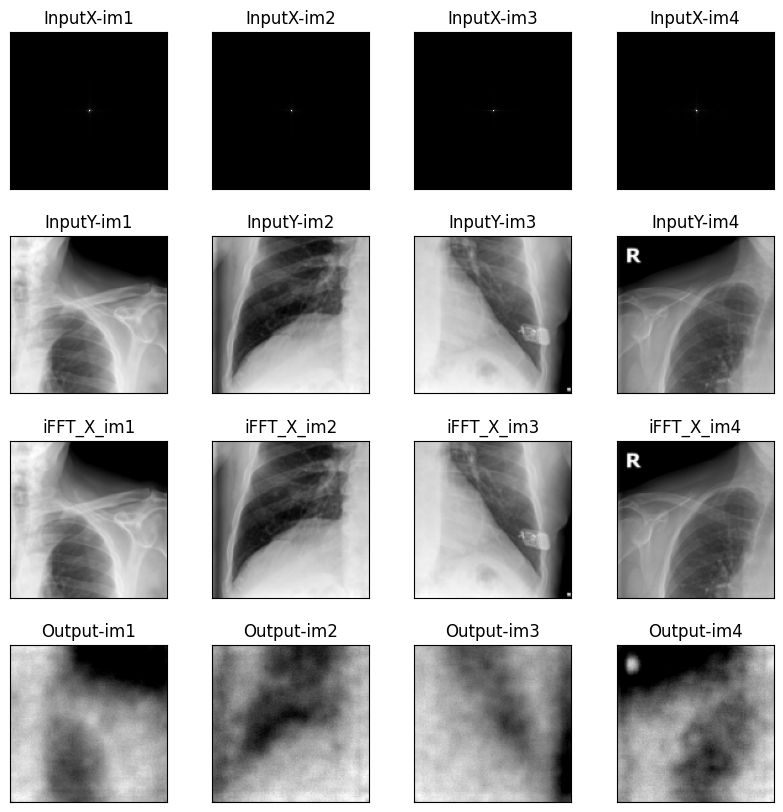

In [ ]:
# Other part of your code remains the same ...
# Visualize the images, their reconstruction using iFFT and using trained model
# 4 images to visualize:
im1 = 0
im2 = 1
im3 = 2
im4 = 3

# iFFT back to image from corrupted frequency space
# Complex image from real and imaginary part
X_dev_compl = X_dev[:, :, :, 0] + X_dev[:, :, :, 1] * 1j

#iFFT
X_iFFT0 = np.fft.ifft2(X_dev_compl[im1, :, :])
X_iFFT1 = np.fft.ifft2(X_dev_compl[im2, :, :])
X_iFFT2 = np.fft.ifft2(X_dev_compl[im3, :, :])
X_iFFT3 = np.fft.ifft2(X_dev_compl[im4, :, :])

# Magnitude of complex image
X_iFFT_M1 = np.sqrt(np.power(X_iFFT0.real, 2)
                    + np.power(X_iFFT0.imag, 2))
X_iFFT_M2 = np.sqrt(np.power(X_iFFT1.real, 2)
                    + np.power(X_iFFT1.imag, 2))
X_iFFT_M3 = np.sqrt(np.power(X_iFFT2.real, 2)
                    + np.power(X_iFFT2.imag, 2))
X_iFFT_M4 = np.sqrt(np.power(X_iFFT3.real, 2)
                    + np.power(X_iFFT3.imag, 2))

# Display results
# Show X - input k-space
plt.figure(figsize = (10,10))
plt.subplot(441), plt.imshow(np.abs(X_dev_compl[im1, :, :]), cmap='gray')
plt.title('InputX-im1'), plt.xticks([]), plt.yticks([])
plt.subplot(442), plt.imshow(np.abs(X_dev_compl[im2, :, :]), cmap='gray')
plt.title('InputX-im2'), plt.xticks([]), plt.yticks([])
plt.subplot(443), plt.imshow(np.abs(X_dev_compl[im3, :, :]), cmap='gray')
plt.title('InputX-im3'), plt.xticks([]), plt.yticks([])
plt.subplot(444), plt.imshow(np.abs(X_dev_compl[im4, :, :]), cmap='gray')
plt.title('InputX-im4'), plt.xticks([]), plt.yticks([])

# Show Y - ground truth
plt.subplot(445), plt.imshow(Y_dev[im1, :, :], cmap='gray')
plt.title('InputY-im1'), plt.xticks([]), plt.yticks([])
plt.subplot(446), plt.imshow(Y_dev[im2, :, :], cmap='gray')
plt.title('InputY-im2'), plt.xticks([]), plt.yticks([])
plt.subplot(447), plt.imshow(Y_dev[im3, :, :], cmap='gray')
plt.title('InputY-im3'), plt.xticks([]), plt.yticks([])
plt.subplot(448), plt.imshow(Y_dev[im4, :, :], cmap='gray')
plt.title('InputY-im4'), plt.xticks([]), plt.yticks([])

# Show images reconstructed using iFFT
plt.subplot(449), plt.imshow(X_iFFT_M1, cmap='gray')
plt.title('iFFT_X_im1'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,10), plt.imshow(X_iFFT_M2, cmap='gray')
plt.title('iFFT_X_im2'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,11), plt.imshow(X_iFFT_M3, cmap='gray')
plt.title('iFFT_X_im3'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,12), plt.imshow(X_iFFT_M4, cmap='gray')
plt.title('iFFT_X_im4'), plt.xticks([]), plt.yticks([])

# Show images reconstructed using neural network
plt.subplot(4,4,13), plt.imshow(Y_recon[im1, :, :], cmap='gray')
plt.title('Output-im1'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,14), plt.imshow(Y_recon[im2, :, :], cmap='gray')
plt.title('Output-im2'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,15), plt.imshow(Y_recon[im3, :, :], cmap='gray')
plt.title('Output-im3'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,16), plt.imshow(Y_recon[im4, :, :], cmap='gray')
plt.title('Output-im4'), plt.xticks([]), plt.yticks([])
plt.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
### Evaluate the model

# Prepare test data
img_start = 201
img_stop = 203
# X_dev, Y_dev = load_STONE_data(  # Load images for training
#     dir_train,
#     n_cases,
#     normalize=False,
#     imrotate=False)

dir_train = '/content/drive/MyDrive/automap/img_tiles'
X_dev, Y_dev = load_x_ray_data(dir_train, img_start, img_stop)
print('X_dev.shape at input = ', X_dev.shape)
print('Y_dev.shape at input = ', Y_dev.shape)

def model_predict(X_dev):
    """ Runs the forward propagation to reconstruct images using trained model
    :param X_dev: input development frequency-space data
    :return: returns the image, reconstructed using a trained model
    """
    with tf.device('/cpu:0'):
        ops.reset_default_graph()  # to not overwrite tf variables
        (_, n_H0, n_W0, _) = X_dev.shape

        # Create Placeholders
        X, Y = create_placeholders(n_H0, n_W0)

        # Initialize parameters
        parameters = initialize_parameters()

        # Build the forward propagation in the tf graph
        forward_propagation(X, parameters)

        # Add ops to save and restore all the variables
        saver = tf.train.Saver()

        # Start the session to compute the tf graph
        with tf.Session() as sess:

            # Chong Duan
            ckpt = tf.train.get_checkpoint_state('./checkpoints_jupyter/')
            saver.restore(sess, ckpt.model_checkpoint_path)

            print("Model restored")

            Y_recon_temp = forward_propagation(X, parameters)
            Y_recon = Y_recon_temp.eval({X: X_dev})

        return parameters, Y_recon

# Reconstruct the image using trained model
_, Y_recon = model_predict(X_dev)
print('Y_recon.shape = ', Y_recon.shape)
print('Y_dev.shape = ', Y_dev.shape)




bigy.shape = (2, 128, 128)
processing image 0/range(0, 2)
processing image 1/range(0, 2)
X_dev.shape at input =  (2, 128, 128, 2)
Y_dev.shape at input =  (2, 128, 128)


NameError: ignored

In [ ]:
# Visualize the images, their reconstruction using iFFT and using trained model
# 4 images to visualize:
im1 = 15
im2 = 16
im3 = 17
im4 = 18

# iFFT back to image from corrupted frequency space
# Complex image from real and imaginary part
X_dev_compl = X_dev[:, :, :, 0] + X_dev[:, :, :, 1] * 1j

#iFFT
X_iFFT0 = np.fft.ifft2(X_dev_compl[im1, :, :])
X_iFFT1 = np.fft.ifft2(X_dev_compl[im2, :, :])
X_iFFT2 = np.fft.ifft2(X_dev_compl[im3, :, :])
X_iFFT3 = np.fft.ifft2(X_dev_compl[im4, :, :])

# Magnitude of complex image
X_iFFT_M1 = np.sqrt(np.power(X_iFFT0.real, 2)
                    + np.power(X_iFFT0.imag, 2))
X_iFFT_M2 = np.sqrt(np.power(X_iFFT1.real, 2)
                    + np.power(X_iFFT1.imag, 2))
X_iFFT_M3 = np.sqrt(np.power(X_iFFT2.real, 2)
                    + np.power(X_iFFT2.imag, 2))
X_iFFT_M4 = np.sqrt(np.power(X_iFFT3.real, 2)
                    + np.power(X_iFFT3.imag, 2))

# Display results
# Show X - input k-space
plt.figure(figsize = (10,10))
plt.subplot(441), plt.imshow(np.abs(X_dev_compl[im1, :, :]), cmap='gray')
plt.title('InputX-im1'), plt.xticks([]), plt.yticks([])
plt.subplot(442), plt.imshow(np.abs(X_dev_compl[im2, :, :]), cmap='gray')
plt.title('InputX-im2'), plt.xticks([]), plt.yticks([])
plt.subplot(443), plt.imshow(np.abs(X_dev_compl[im3, :, :]), cmap='gray')
plt.title('InputX-im3'), plt.xticks([]), plt.yticks([])
plt.subplot(444), plt.imshow(np.abs(X_dev_compl[im4, :, :]), cmap='gray')
plt.title('InputX-im4'), plt.xticks([]), plt.yticks([])

# Show Y - ground truth
plt.subplot(445), plt.imshow(Y_dev[im1, :, :], cmap='gray')
plt.title('InputY-im1'), plt.xticks([]), plt.yticks([])
plt.subplot(446), plt.imshow(Y_dev[im2, :, :], cmap='gray')
plt.title('InputY-im2'), plt.xticks([]), plt.yticks([])
plt.subplot(447), plt.imshow(Y_dev[im3, :, :], cmap='gray')
plt.title('InputY-im3'), plt.xticks([]), plt.yticks([])
plt.subplot(448), plt.imshow(Y_dev[im4, :, :], cmap='gray')
plt.title('InputY-im4'), plt.xticks([]), plt.yticks([])

# Show images reconstructed using iFFT
plt.subplot(449), plt.imshow(X_iFFT_M1, cmap='gray')
plt.title('iFFT_X_im1'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,10), plt.imshow(X_iFFT_M2, cmap='gray')
plt.title('iFFT_X_im2'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,11), plt.imshow(X_iFFT_M3, cmap='gray')
plt.title('iFFT_X_im3'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,12), plt.imshow(X_iFFT_M4, cmap='gray')
plt.title('iFFT_X_im4'), plt.xticks([]), plt.yticks([])

# Show images reconstructed using neural network
plt.subplot(4,4,13), plt.imshow(Y_recon[im1, :, :], cmap='gray')
plt.title('Output-im1'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,14), plt.imshow(Y_recon[im2, :, :], cmap='gray')
plt.title('Output-im2'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,15), plt.imshow(Y_recon[im3, :, :], cmap='gray')
plt.title('Output-im3'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,16), plt.imshow(Y_recon[im4, :, :], cmap='gray')
plt.title('Output-im4'), plt.xticks([]), plt.yticks([])
plt.subplots_adjust(hspace=0.3)
plt.show()